In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from scipy.signal import detrend
from scipy.interpolate import griddata 
from modules.Sama_Irai import calang,caldist
from scipy import std
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
import scipy as sp

In [2]:
head = ['LAT', 'LONG', 'H', 'F']
total = pd.read_excel('TOTAL.xls', header= None, names=head)
total.LAT = total.LAT/1000
total.LONG = total.LONG/1000
teste = pd.read_excel('Teste.xls', header=0)
teste = teste.loc[teste.DATE != 1986.5]
teste = teste.loc[teste.DATE != 1987.5]
teste = teste.reset_index()

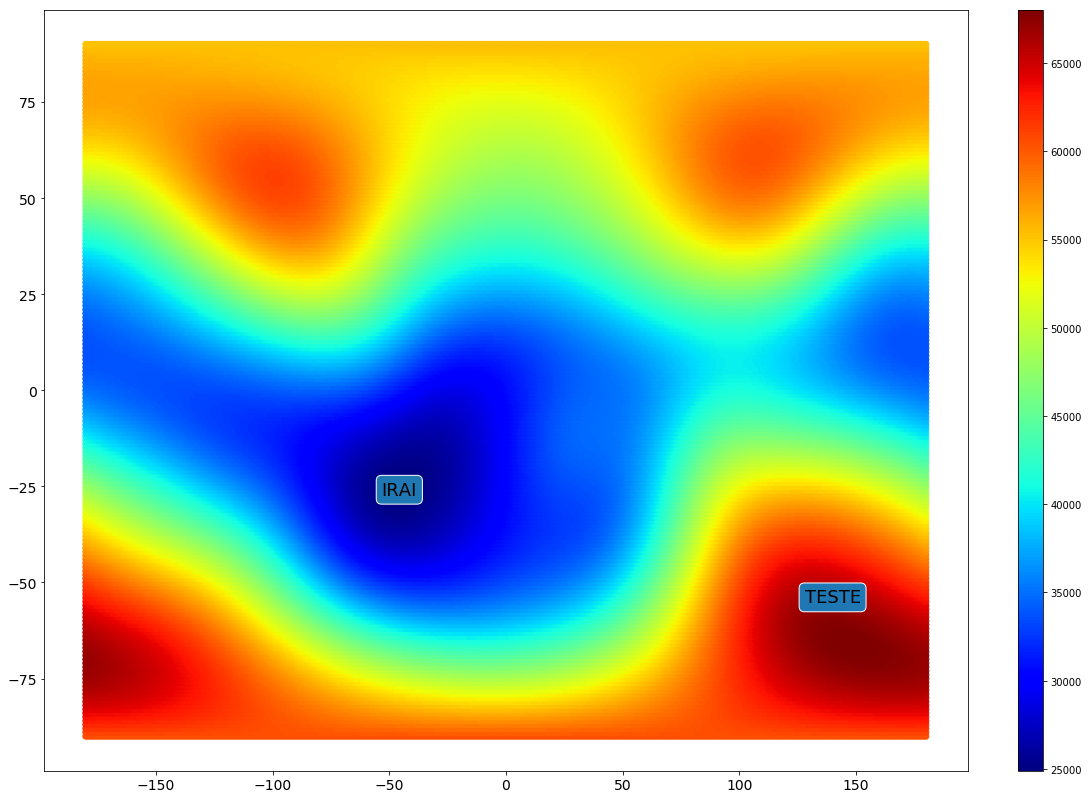

In [3]:
plt.figure(figsize=(18,14), facecolor='w')
bbox_props = dict(boxstyle="round,pad=0.3", ec="w", lw=1)

ax1 = plt.scatter(total.LONG, total.LAT, c= total.F, cmap='jet')
cbar = plt.colorbar(ax1, aspect=30, fraction = 0.03, orientation="vertical")
plt.annotate('IRAI' , xy=(-53.23,-27.18) , bbox=bbox_props, fontsize = 18)
plt.annotate('TESTE' , xy=(128.00,-55.18) , bbox=bbox_props, fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('Estacao_Teste.png', dpi = 300)

plt.show()

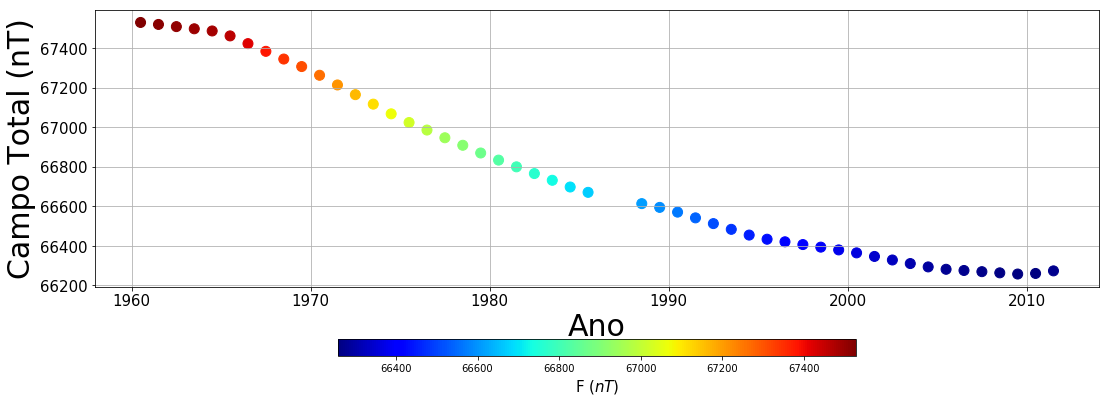

In [4]:
plt.figure(figsize=(18,14), facecolor='w')
plt.subplot(212)
p2 = plt.scatter(teste.DATE, teste.F, c=teste.F,cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo Total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.show()

In [5]:
dobs = np.array(teste.F)
G1 = np.array(teste.DATE)
G2 = np.zeros(len(teste.DATE))
for i in range(len(G2)):
    G2[i] = 1.0
G = np.c_[G1,G2]
param1 = np.linalg.inv(np.dot(G.T,G))
param2 = np.dot(G.T,dobs)
param = np.dot(param1,param2)
y = np.dot(G,param)

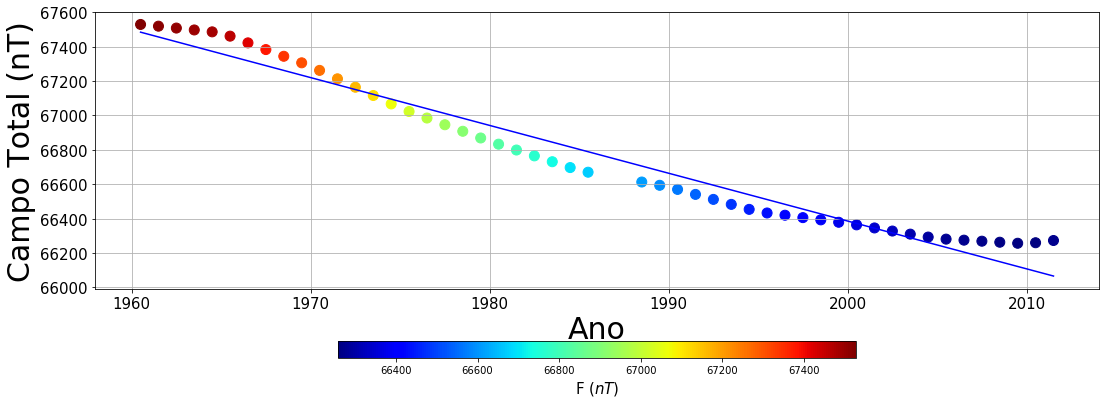

In [6]:
plt.figure(figsize=(18,14), facecolor='w')
plt.subplot(212)
p2 = plt.scatter(teste.DATE, teste.F, c=teste.F,cmap='jet',s = 100)
plt.plot(teste.DATE,y,'blue')
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo Total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.savefig('Estacao_Teste_Tendencia.pdf', dpi = 300)

plt.show()

In [7]:
# Criacao dos dataframes aqui:
data = pd.read_csv('IGRF/Campo_Total',delim_whitespace= True,usecols=[0,13])

SP1 = pd.read_excel('SP.xls')

SPN = pd.read_excel('SPN.xls')

irai = pd.read_excel('Irai(RS).xls',sheet_name=2,skiprows=4,usecols=[0,19])
irai['Lat'] = -27.18
irai['Long'] = -53.23
header = ['Ano', 'Long','Lat','F']
sama = pd.read_excel('Sama.xls')

In [8]:
irai = irai.loc[irai.Media != 0.0]
irai = irai.reset_index()

In [9]:
data = data.loc[data.DATE != 1986.5]
data = data.loc[data.DATE != 1987.5]
data = data.reset_index()

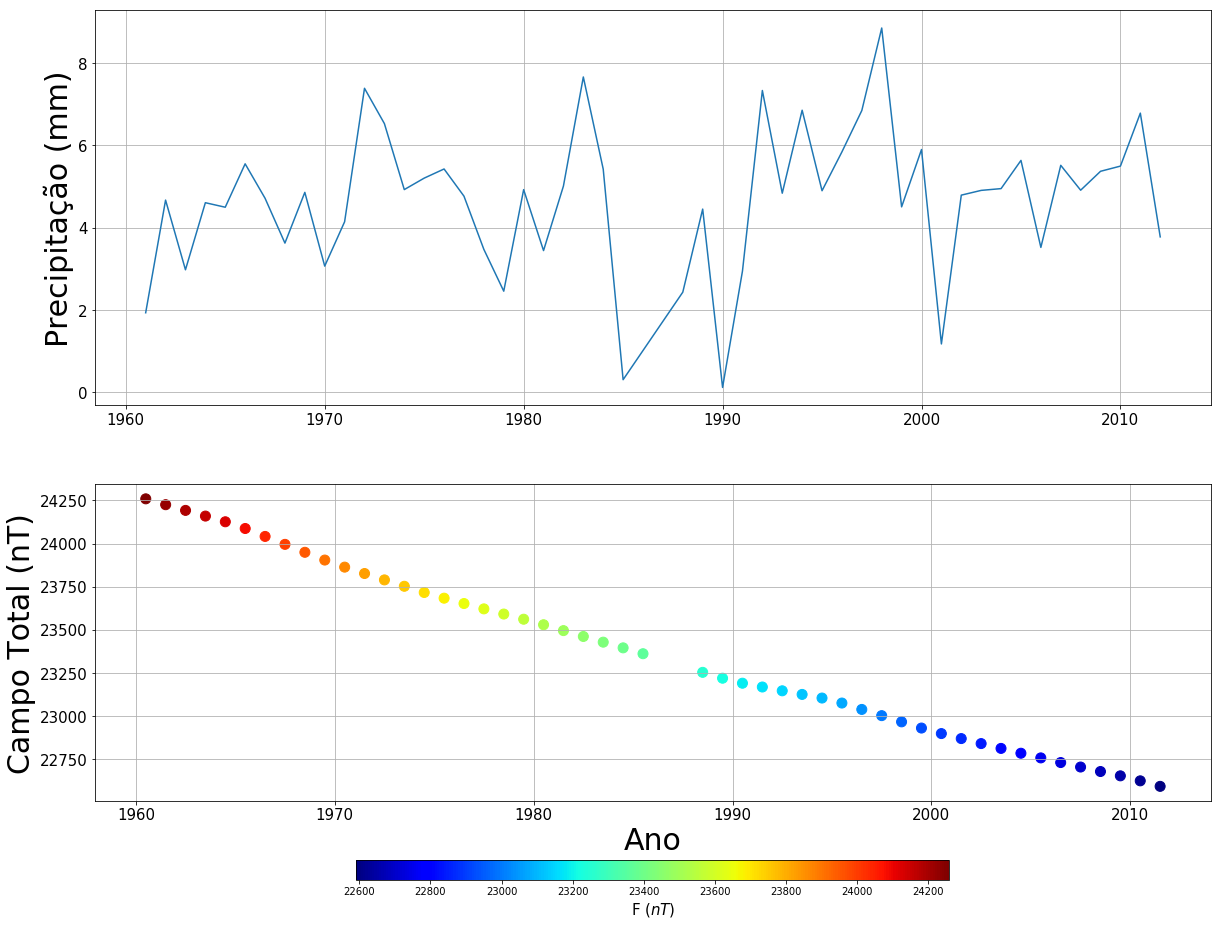

In [10]:
plt.figure(figsize=(20,16),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(irai['Ano'],irai['Media'])
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.scatter(data['DATE'],data['F'], c=data['F'],cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo Total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.savefig('Precipitação vs Campo Total.pdf', dpi=300, transparet=True, bbox_inches='tight')

plt.show()

In [11]:
F_sem = data.F - y

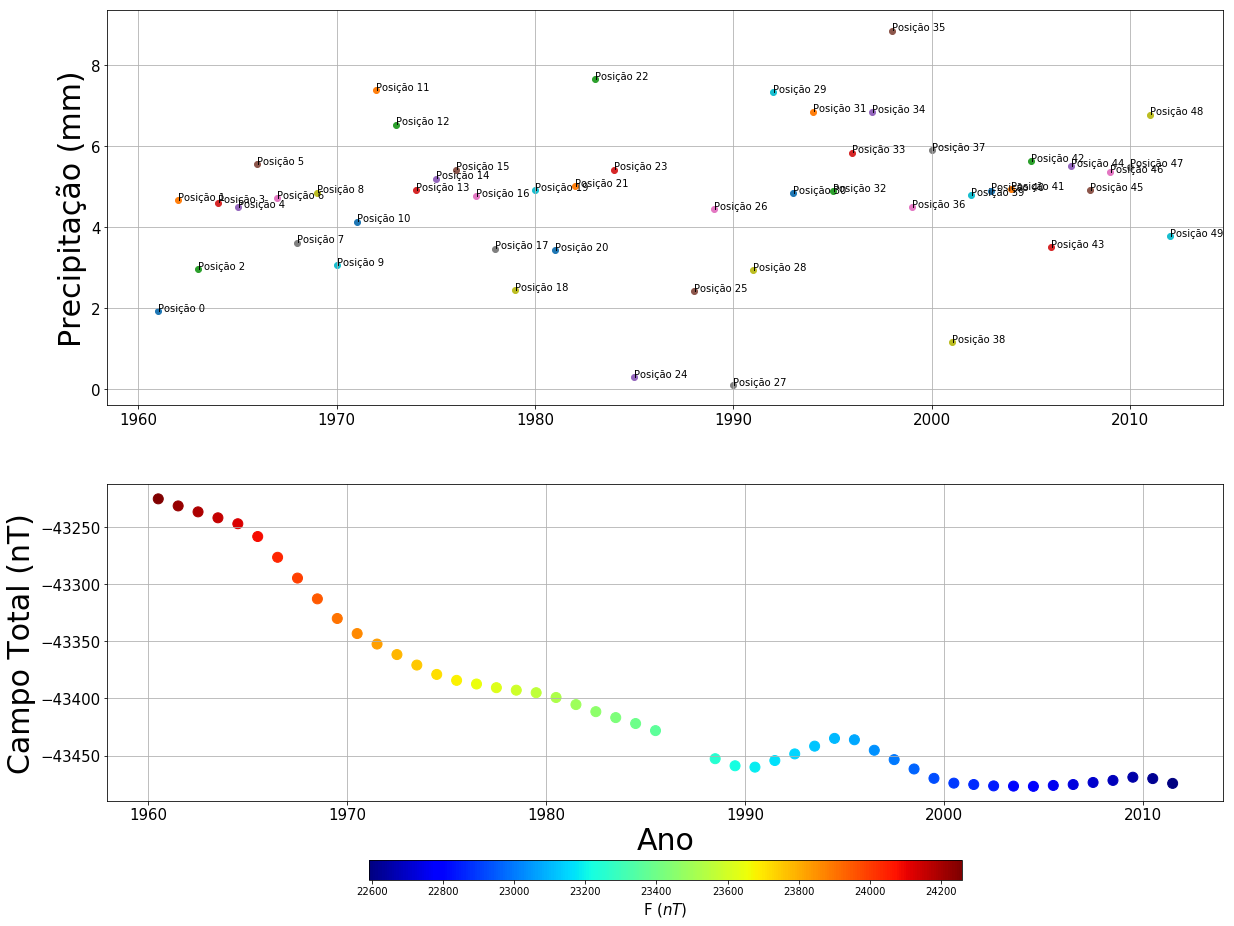

In [12]:
plt.figure(figsize=(20,16),facecolor = 'w')

plt.subplot(211)
for i in range(len(irai)):
    plt.scatter(irai['Ano'][i],irai['Media'][i])
    plt.annotate(f'Posição {i}', xy = (irai.Ano[i], irai.Media[i]))
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.scatter(data.DATE,F_sem, c=data['F'],cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo Total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.savefig('Precipitação vs Campo Total.pdf', dpi=300, transparet=True, bbox_inches='tight')

plt.show()

In [13]:
irai_antes = irai.loc[irai.index<=22]
irai_depois = irai.loc[irai.index >= 31]
media_antes = np.average(irai_antes)
media_depois = np.average(irai_depois)

In [20]:
print(f'Média antes = {media_antes} \n Média depois = {media_depois}')

Média antes = 381.43845797101443 
 Média depois = 393.97633947368394


In [15]:
corr1 = (sp.correlate(irai.Media,F_sem,mode='same'))
corr = corr1/np.linalg.norm(corr1)

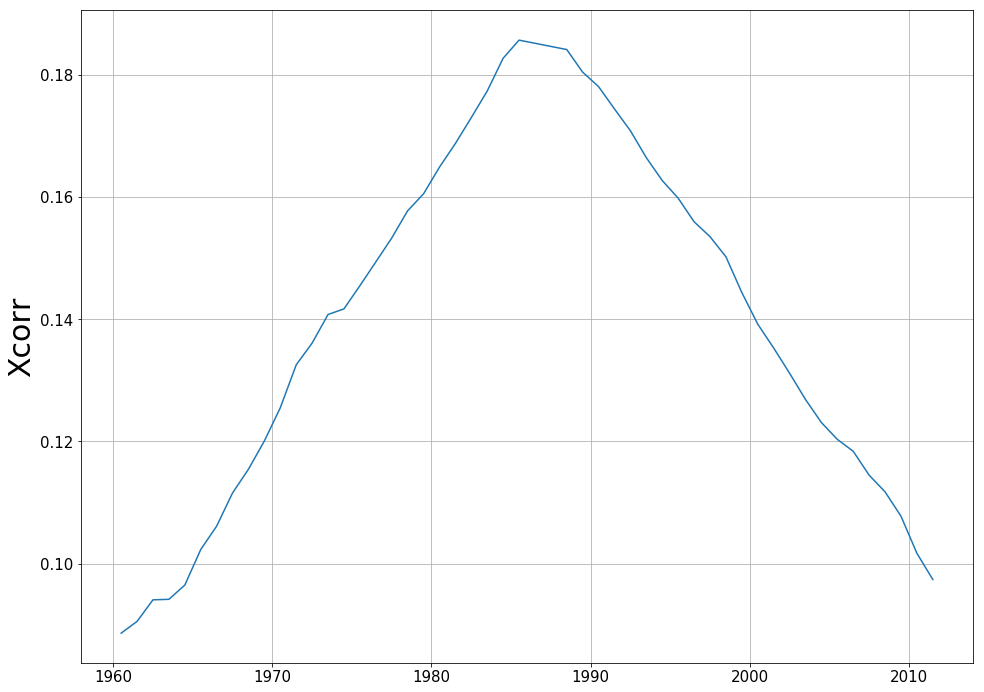

In [21]:
plt.figure(figsize=(16,12),facecolor = 'w')

p0 = plt.plot(data.DATE,-corr)
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Xcorr', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('X_corr.pdf', dpi = 300)

plt.grid()

In [17]:
spear = spearmanr(irai.Media, F_sem)
wilcox = wilcoxon(irai.Media,F_sem,correction=True)
ttest = ttest_ind(irai.Media,F_sem)


In [18]:
print(f'Spearman = {spear}')
print(f'Wilcoxon = {wilcox}')
print(f'T-test = {ttest}')

Spearman = SpearmanrResult(correlation=-0.18309723889555823, pvalue=0.20311114537837996)
Wilcoxon = WilcoxonResult(statistic=0.0, pvalue=7.790492207218421e-10)
T-test = Ttest_indResult(statistic=3900.8685943616265, pvalue=3.478177474991955e-256)
